## Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#mouse_metadata["Mouse ID"].count()
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df.drop_duplicates()
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df["Mouse ID"].describe()


count     1892
unique     249
top       g989
freq        12
Name: Mouse ID, dtype: object

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
drug = mouse_study_df.groupby("Drug Regimen")
drug_mean = drug["Tumor Volume (mm3)"].mean()
drug_median = drug["Tumor Volume (mm3)"].median()
drug_var = drug["Tumor Volume (mm3)"].var()
drug_std = drug["Tumor Volume (mm3)"].std()
drug_sem = drug["Tumor Volume (mm3)"].sem()
stat_df = pd.DataFrame({"Mean Tumor Volume": drug_mean,"Median Tumor Volume": drug_median,"Tumor Volume Variance": drug_var,"Tumor Volume Std. Dev.": drug_std,"Tumor Volume Std. Err.": drug_sem})
stat_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#df.groupby('A').agg(['min', 'max'])
# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = mouse_study_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std','sem'])
agg_df["Tumor Volume (mm3)"]

          # Tumor Volume (mm3)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

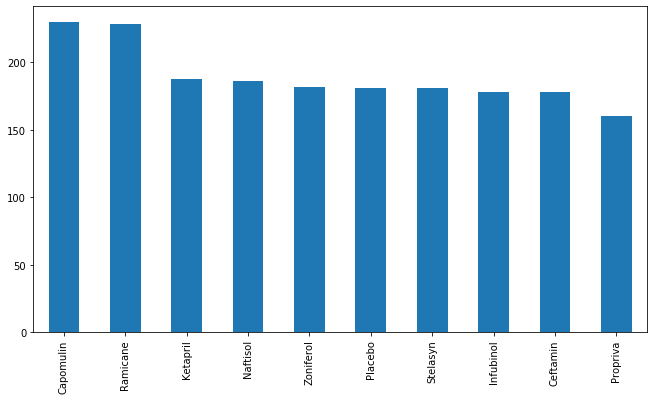

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_df = mouse_study_df["Drug Regimen"].value_counts()
tp_df.plot(kind="bar", figsize=(11,6))





(-1, 10)

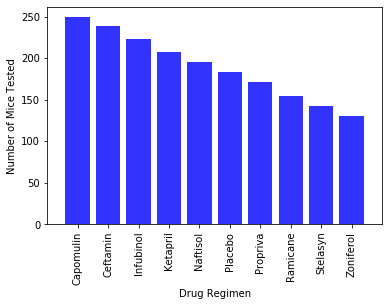

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tp = mouse_study_df["Timepoint"].value_counts()
tp_y = [249, 238, 223, 207, 195, 183, 171, 154, 142, 130]
x_axis = np.arange(len(tp))
plt.bar(x_axis, tp_y, alpha=.8, color='b')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-1, len(x_axis))


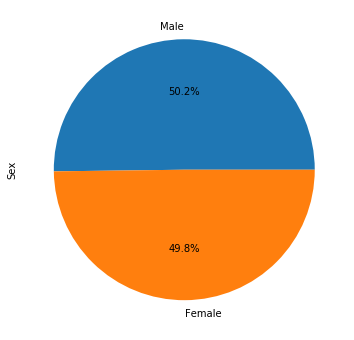

In [11]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouse_metadata["Sex"].value_counts()
sex.plot(kind="pie", figsize=(11,6), autopct="%1.1f%%")




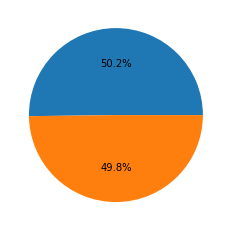

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_tp = mouse_study_df.groupby("Mouse ID").agg(['max', 'min'])
mouse_tp

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_df = pd.merge(mouse_study_df, mouse_tp, on="Mouse ID")
df3 = updated_df
df3

/Users/JAS/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,"(Drug Regimen, max)","(Drug Regimen, min)",...,"(Age_months, max)","(Age_months, min)","(Weight (g), max)","(Weight (g), min)","(Timepoint, max)","(Timepoint, min)","(Tumor Volume (mm3), max)","(Tumor Volume (mm3), min)","(Metastatic Sites, max)","(Metastatic Sites, min)"
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Ramicane,...,21,21,16,16,45,0,45.000000,22.050126,1,0
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Ramicane,...,21,21,16,16,45,0,45.000000,22.050126,1,0
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Ramicane,...,21,21,16,16,45,0,45.000000,22.050126,1,0
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Ramicane,...,21,21,16,16,45,0,45.000000,22.050126,1,0
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Ramicane,...,21,21,16,16,45,0,45.000000,22.050126,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,Naftisol,Naftisol,...,9,9,30,30,45,0,73.867845,45.000000,4,0
1888,z969,Naftisol,Male,9,30,30,65.841013,3,Naftisol,Naftisol,...,9,9,30,30,45,0,73.867845,45.000000,4,0
1889,z969,Naftisol,Male,9,30,35,69.176246,4,Naftisol,Naftisol,...,9,9,30,30,45,0,73.867845,45.000000,4,0
1890,z969,Naftisol,Male,9,30,40,70.314904,4,Naftisol,Naftisol,...,9,9,30,30,45,0,73.867845,45.000000,4,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
min_tum = df3['Tumor Volume (mm3)', 'min']
quartiles = min_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap = mouse_study_df.loc[:, "Drug Regimen"] == "Capomulin"
#cap.value_counts()
x_axis = np.arange(0, 1892, 1)
t_vol = mouse_study_df.groupby("Tumor Volume (mm3)")
t_vol
#plt.plot(x_axis, cap)
#plt.plot(x_axis, t_vol)


1644

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

